# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [PHI Home Field Spray Chart](#PHI-Spray-Chart)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Pitch Location](#Pitch-Locations)
    - [Pitch Location - All-Pitches](#Pitch-Location--All-Pitches)
- [Heatmaps](#Heatmaps)
    - [Fastball Heatmaps](#Fastball-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [1]:
from pybaseball import spraychart
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
gallo = pd.read_csv('../data/joey-gallo.csv')
gallo.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(gallo.shape)
gallo.head(2)

(2612, 91)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
0,CH,2021-10-03,88.2,-1.68,6.43,"Gallo, Joey",608336,608379,walk,ball,13.0,Joey Gallo walks.,R,L,R,NYY,TB,B,NaN,NaN,3,2,2021,-1.25,10.44,-0.22,0.85,NaN,NaN,NaN,0,5,Bot,NaN,NaN,572287,6.170261,-127.963976,-9.239343,-15.024134,27.411927,-20.824096,3.43,1.68,NaN,NaN,NaN,88.1,1728.0,6.5,632239,608379,572287,596847,664040,621563,677551,640457,595281,668227,54.00,NaN,NaN,0.7,1.0,0.0,0.0,NaN,34,6,Changeup,0,0,0,0,0,0,0,0,Infield shift,4th outfielder,238.0,0.047,0.329,0,3-2,0.22,15.00,0,0,0
1,CH,2021-10-03,87.6,-1.62,6.39,"Gallo, Joey",608336,608379,NaN,ball,13.0,Joey Gallo walks.,R,L,R,NYY,TB,B,NaN,NaN,2,2,2021,-1.46,5.88,-1.50,0.81,NaN,NaN,NaN,0,5,Bot,NaN,NaN,572287,3.321954,-127.264439,-8.279582,-16.517043,29.255519,-25.181799,3.53,1.68,NaN,NaN,NaN,87.2,1712.0,6.4,632239,608379,572287,596847,664040,621563,677551,640457,595281,668227,54.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,5,Changeup,0,0,0,0,0,0,0,0,Infield shift,4th outfielder,244.0,0.000,0.101,0,2-2,1.50,17.52,0,0,0


In [3]:
zero_zero = gallo.loc[(gallo['pitch_count'] == '0-0')]
zero_zero.description.value_counts()

ball               279
called_strike      163
foul                63
swinging_strike     60
hit_into_play       48
hit_by_pitch         2
Name: description, dtype: int64

In [4]:
gallo.groupby(['bb_type']).mean()

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss,first_pitch_take,first_pitch_swing
bb_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fly_ball,89.401980,-0.688713,5.819604,608336.0,597897.009804,5.702970,7.575758,1.264706,1.049020,2021.0,-0.190396,8.076832,-0.061782,2.531881,605146.750000,592870.846154,628553.709677,1.039216,4.598039,136.881569,75.295980,582357.598039,2.027371,-130.064379,-3.547824,-2.783223,27.347353,-23.130907,3.58,1.68,332.891089,98.757426,39.485149,89.372277,2159.405941,6.269307,633367.647059,597897.009804,582357.598039,604657.764706,596658.215686,606807.127451,604838.343137,621043.362745,621188.774510,612396.519608,54.227129,0.383693,0.715545,0.790196,1.0,0.078431,1.098039,4.346535,34.735294,3.392157,2.078431,1.696078,1.803922,1.970588,1.960784,2.392157,2.382353,1.970588,190.970297,0.011716,0.387853,1.0,0.061782,2.284752,0.0,0.0,0.088235
ground_ball,87.674757,-0.539029,5.855922,608336.0,593921.442308,6.834951,4.500000,0.903846,0.865385,2021.0,-0.290485,4.986408,-0.228447,2.339417,633113.777778,607958.823529,620575.242424,0.865385,4.942308,143.907500,153.568269,587996.778846,1.400504,-127.572886,-3.255260,-3.605697,26.263964,-26.368677,3.58,1.68,36.194175,80.664078,-12.019417,87.535922,2076.504854,6.193204,633540.894231,593921.442308,587996.778846,594723.317308,596744.884615,600961.403846,612013.201923,619238.394231,613004.028846,618220.461538,54.307573,0.271505,0.252641,0.207692,1.0,0.230769,0.000000,2.242718,37.115385,2.836538,1.788462,2.038462,1.759615,2.067308,2.115385,1.798077,1.846154,2.067308,189.844660,-0.000712,-0.131942,1.0,0.228447,3.485825,0.0,0.0,0.259615
line_drive,89.117778,0.009556,5.836667,608336.0,606920.755556,6.866667,7.488372,1.288889,0.955556,2021.0,-0.113111,6.818667,-0.124889,2.245111,658119.333333,654200.500000,637999.454545,0.822222,4.533333,149.856000,92.456667,601303.288889,-0.050880,-129.626996,-4.019466,-1.223543,27.177759,-24.329474,3.58,1.68,260.133333,96.173333,18.244444,89.153333,2187.422222,6.326667,633661.244444,606920.755556,601303.288889,594851.288889,599824.888889,613283.000000,610749.577778,617091.133333,616758.844444,616098.311111,54.176889,0.710022,0.832467,0.754444,1.0,0.644444,0.377778,4.511111,33.511111,3.311111,1.933333,1.511111,1.555556,1.888889,1.577778,2.022222,1.711111,1.888889,193.511111,0.004533,0.327800,1.0,0.124889,1.357333,0.0,0.0,0.200000
popup,89.128571,0.008286,5.870857,608336.0,607392.371429,6.285714,4.657143,1.257143,1.142857,2021.0,0.019429,9.620571,0.104571,2.728571,609029.000000,640916.833333,634434.272727,0.914286,4.114286,114.429143,159.307714,591540.885714,0.272307,-129.687738,-3.380529,0.418358,26.738337,-22.010933,3.58,1.68,137.714286,82.628571,66.000000,89.125714,2257.400000,6.251429,633342.114286,607392.371429,591540.885714,604183.828571,610495.628571,596707.400000,616263.942857,615892.485714,618503.571429,612070.400000,54.257429,0.010800,0.011000,0.000000,1.0,0.000000,0.000000,2.942857,31.742857,3.657143,1.885714,1.771429,1.514286,2.142857,1.771429,1.885714,1.514286,2.142857,187.657143,-0.001657,-0.247943,1.0,-0.104571,-0.233143,0.0,0.0,0.057143


In [5]:
full_count = gallo.loc[gallo['pitch_count'] == '3-2']
r_gallo = gallo.loc[gallo['p_throws'] == 'R']
l_gallo = gallo.loc[gallo['p_throws'] == 'L']

ff = gallo.loc[gallo['pitch_type'] == 'FF']
sl = gallo.loc[gallo['pitch_type'] == 'SL']
ch = gallo.loc[gallo['pitch_type'] == 'CH']
si = gallo.loc[gallo['pitch_type'] == 'SI']
cu = gallo.loc[gallo['pitch_type'] == 'CU']
fc = gallo.loc[gallo['pitch_type'] == 'FC']
fs = gallo.loc[gallo['pitch_type'] == 'FS']
kc = gallo.loc[gallo['pitch_type'] == 'KC']
cs = gallo.loc[gallo['pitch_type'] == 'CS']

r_ff = gallo.loc[(gallo['pitch_type'] == 'FF') & (gallo['p_throws'] == 'R')]
r_sl = gallo.loc[(gallo['pitch_type'] == 'SL') & (gallo['p_throws'] == 'R')]
r_ch = gallo.loc[(gallo['pitch_type'] == 'CH') & (gallo['p_throws'] == 'R')]
r_si = gallo.loc[(gallo['pitch_type'] == 'SI') & (gallo['p_throws'] == 'R')]
r_cu = gallo.loc[(gallo['pitch_type'] == 'CU') & (gallo['p_throws'] == 'R')]
r_fc = gallo.loc[(gallo['pitch_type'] == 'FC') & (gallo['p_throws'] == 'R')]
r_fs = gallo.loc[(gallo['pitch_type'] == 'FS') & (gallo['p_throws'] == 'R')]
r_kc = gallo.loc[(gallo['pitch_type'] == 'KC') & (gallo['p_throws'] == 'R')]
r_cs = gallo.loc[(gallo['pitch_type'] == 'CS') & (gallo['p_throws'] == 'R')]

l_ff = gallo.loc[(gallo['pitch_type'] == 'FF') & (gallo['p_throws'] == 'L')]
l_sl = gallo.loc[(gallo['pitch_type'] == 'SL') & (gallo['p_throws'] == 'L')]
l_ch = gallo.loc[(gallo['pitch_type'] == 'CH') & (gallo['p_throws'] == 'L')]
l_si = gallo.loc[(gallo['pitch_type'] == 'SI') & (gallo['p_throws'] == 'L')]
l_cu = gallo.loc[(gallo['pitch_type'] == 'CU') & (gallo['p_throws'] == 'L')]
l_fc = gallo.loc[(gallo['pitch_type'] == 'FC') & (gallo['p_throws'] == 'L')]
l_fs = gallo.loc[(gallo['pitch_type'] == 'FS') & (gallo['p_throws'] == 'L')]
l_kc = gallo.loc[(gallo['pitch_type'] == 'KC') & (gallo['p_throws'] == 'L')]
l_cs = gallo.loc[(gallo['pitch_type'] == 'CS') & (gallo['p_throws'] == 'L')]

# Spray Chart

### TEX Spray Chart

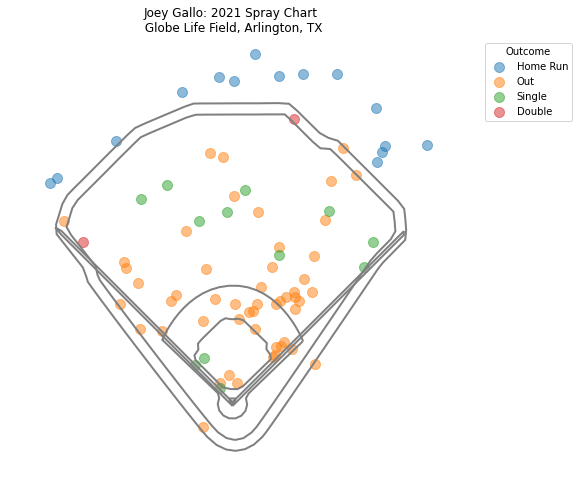

In [6]:
spray_tex = gallo[gallo['home_team'] == 'TEX']
spray_tex = spray_tex.loc[spray_tex['events'] != 'double_play']
spraychart(spray_tex, 'rangers', title = 'Joey Gallo: 2021 Spray Chart \n Globe Life Field, Arlington, TX');

### NYY Spray Chart

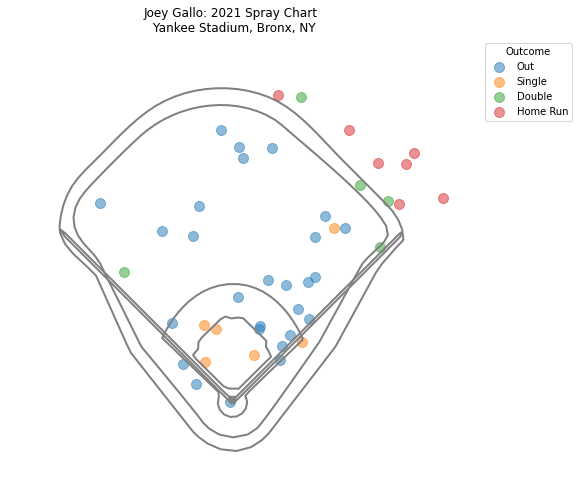

In [7]:
spray_nyy = gallo[gallo['home_team'] == 'NYY']
spraychart(spray_nyy, 'yankees', title = 'Joey Gallo: 2021 Spray Chart \n Yankee Stadium, Bronx, NY');

# Pitch Usage / Counts

### Pitch Usage by Pitcher Handedness

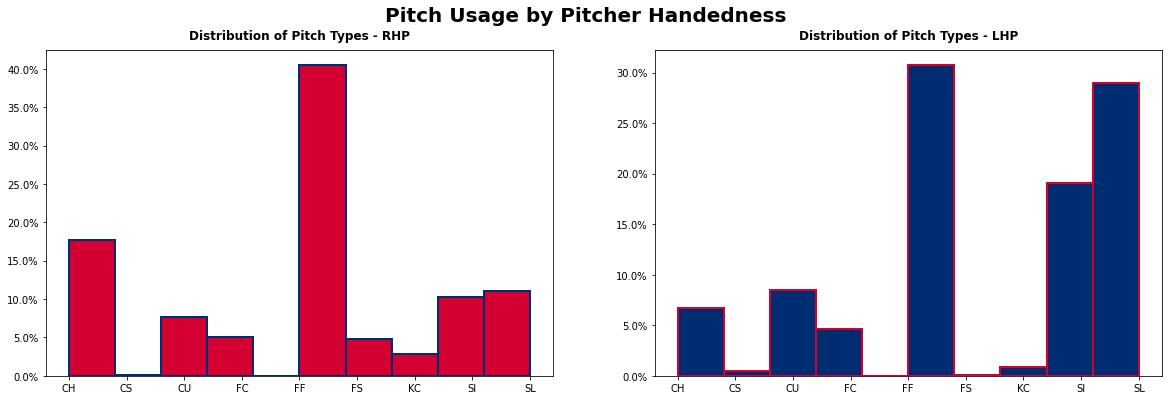

In [8]:
r_gallo.dropna(subset=['pitch_type'], inplace = True)
l_gallo.dropna(subset=['pitch_type'], inplace = True)

blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')

dist_r = r_gallo.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)

dist_l = l_gallo.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

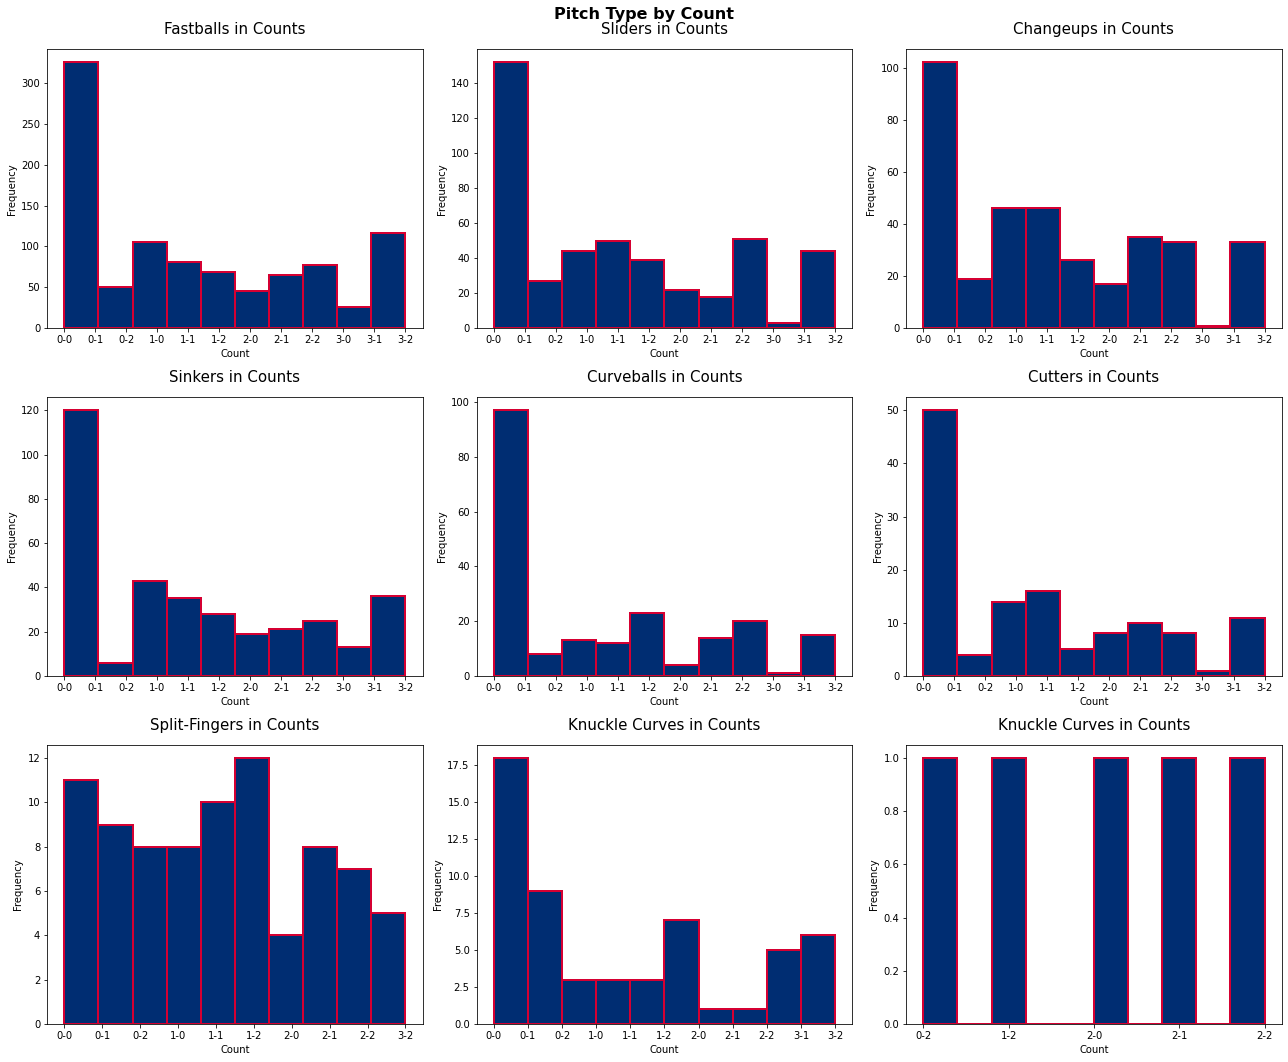

In [9]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')

axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Fastballs in Counts', fontsize = 15, pad = 15)

axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Sliders in Counts', fontsize = 15, pad = 15)

axs[0][2].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][2].set_title('Changeups in Counts', fontsize = 15, pad = 15)

axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinkers in Counts', fontsize = 15, pad = 15)

axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveballs in Counts', fontsize = 15, pad = 15)

axs[1][2].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][2].set_title('Cutters in Counts', fontsize = 15, pad = 15)

axs[2][0].hist(fs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Split-Fingers in Counts', fontsize = 15, pad = 15)

axs[2][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)

axs[2][2].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][2].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

# Pitch Location

### Pitch Location - All Pitches

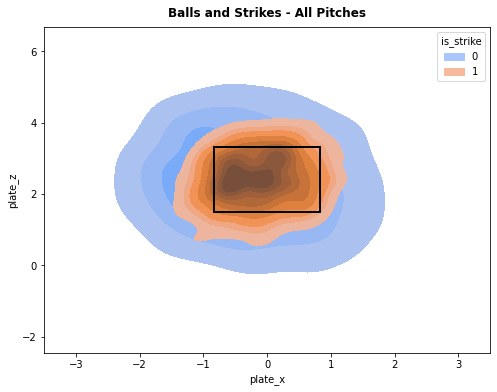

In [10]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = gallo, x = 'plate_x', y = 'plate_z', hue = 'is_strike', fill = True, palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.xlim(-3.5, 3.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

# Heatmaps

### Fastball Heatmaps

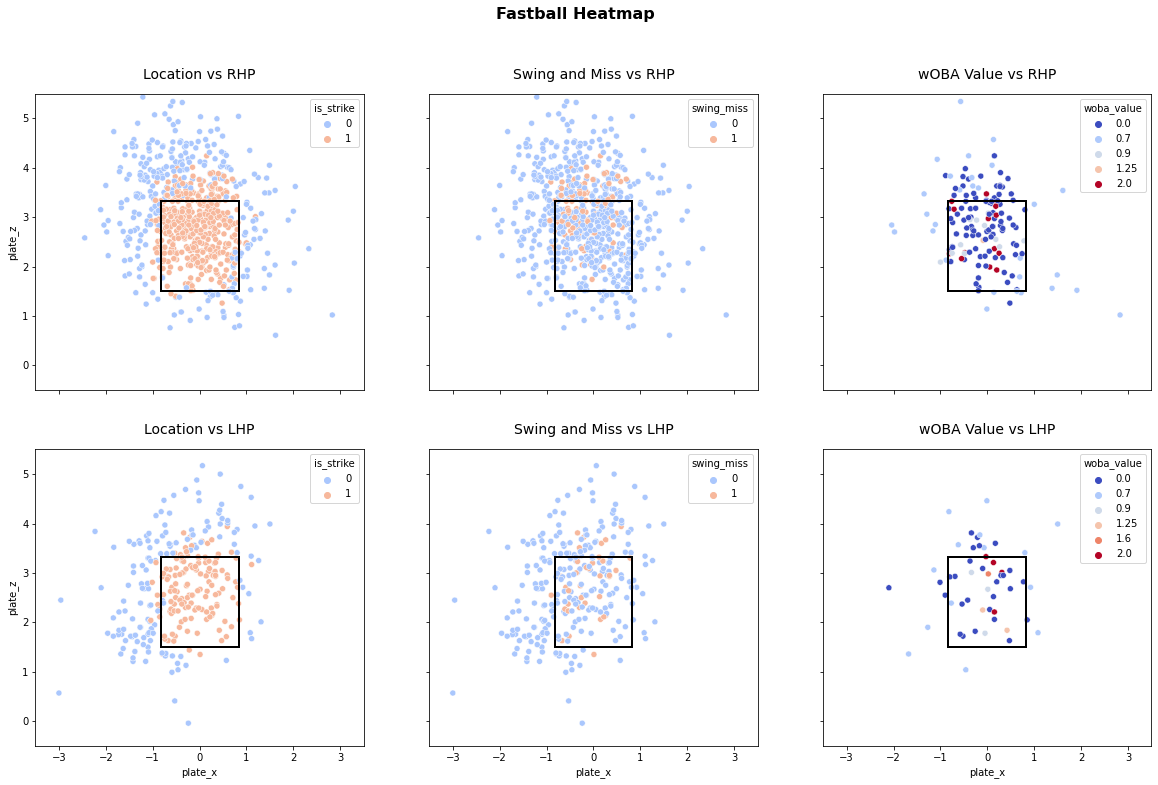

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Fastball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

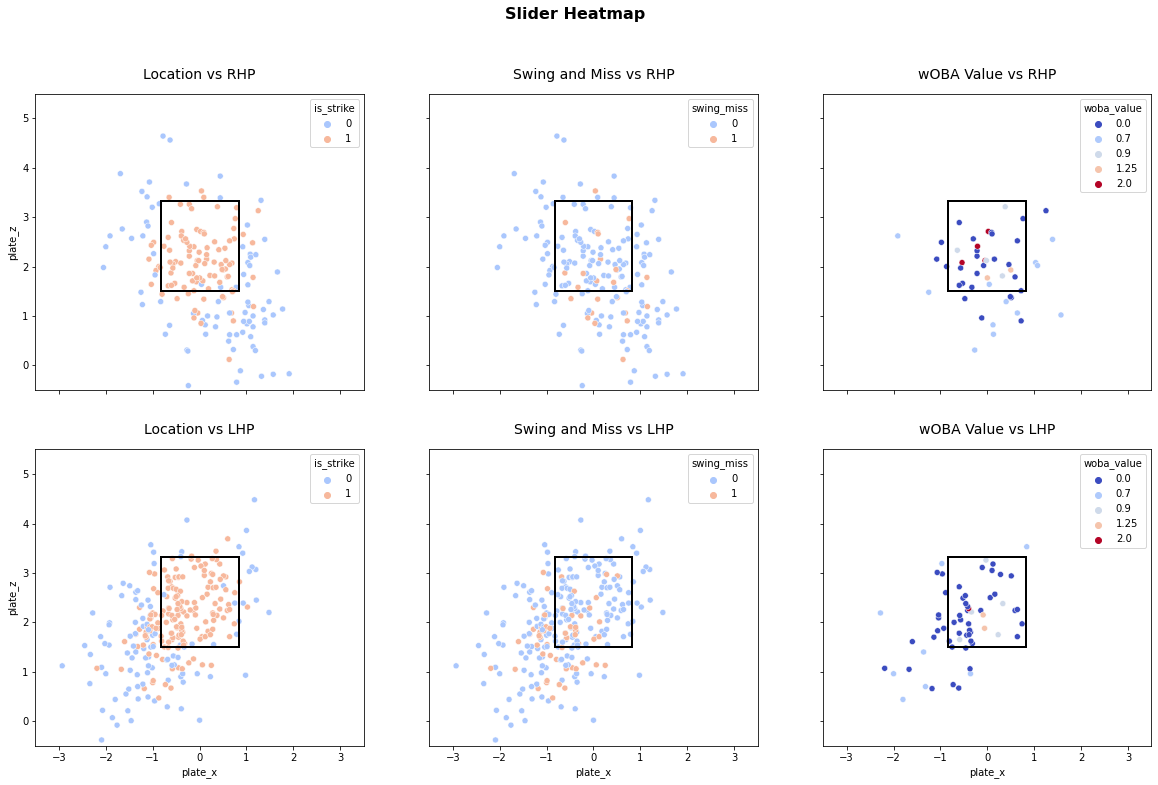

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

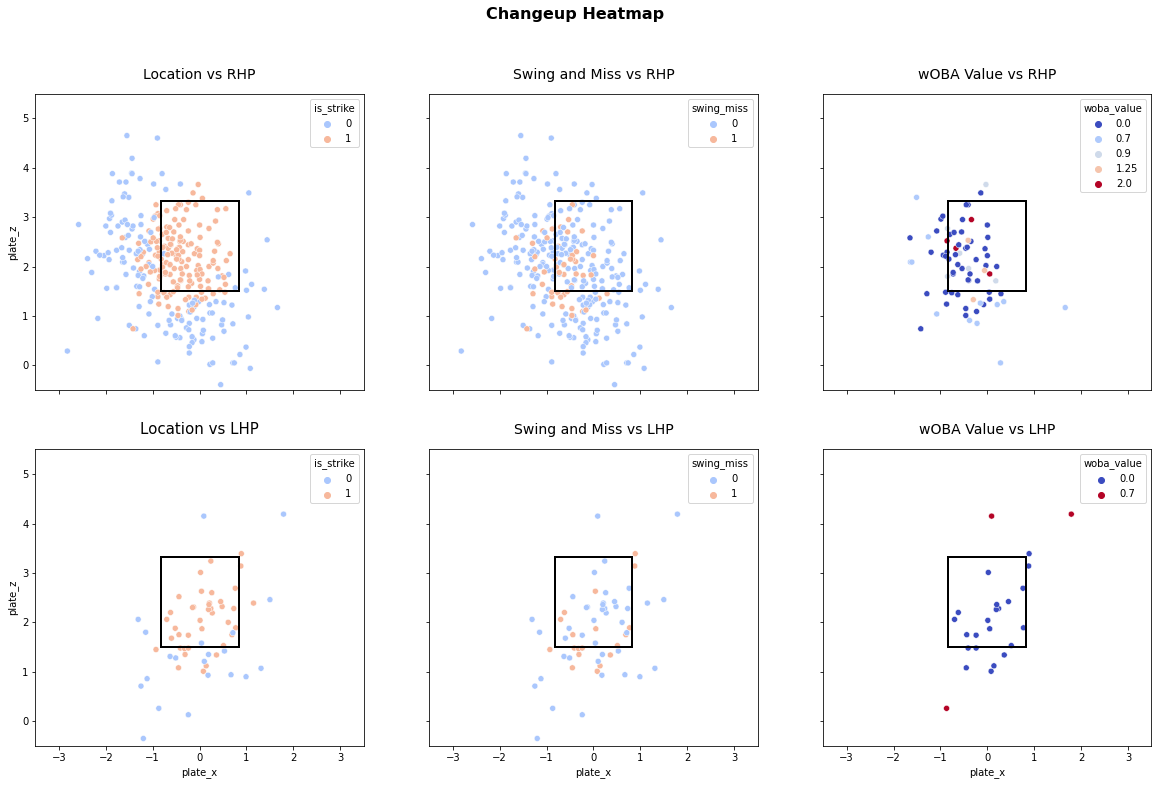

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

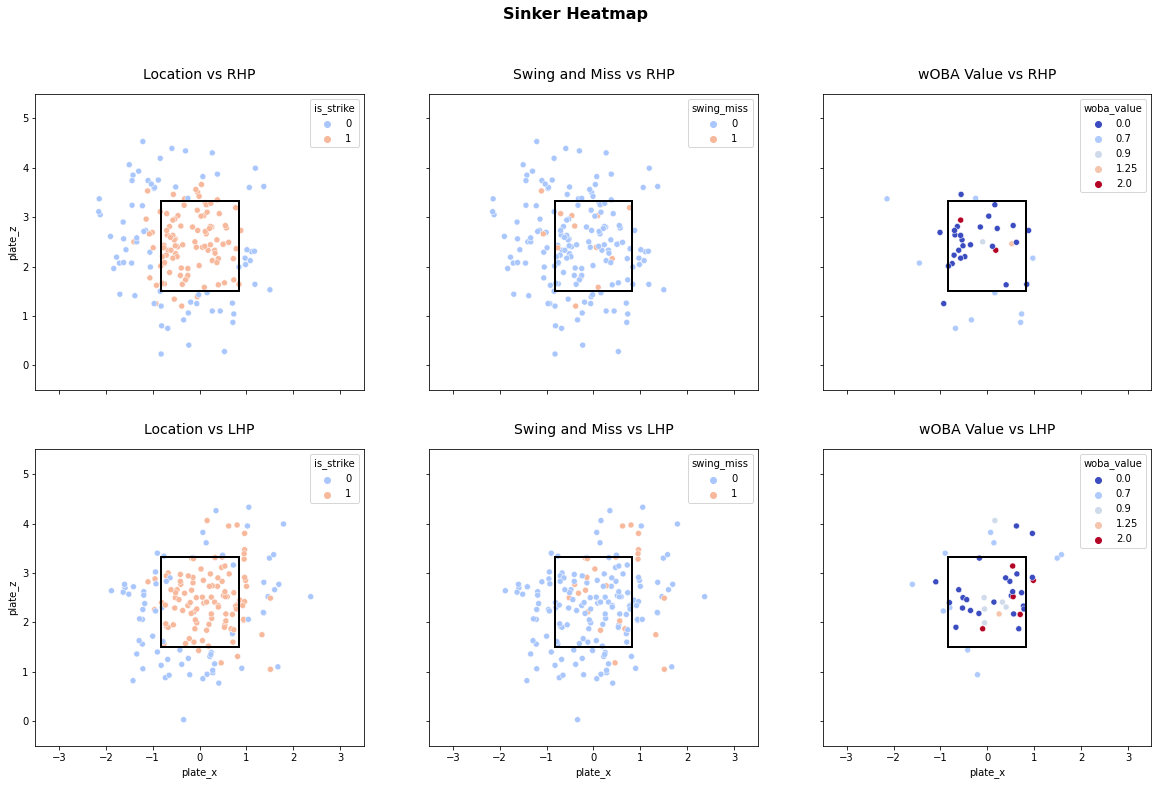

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

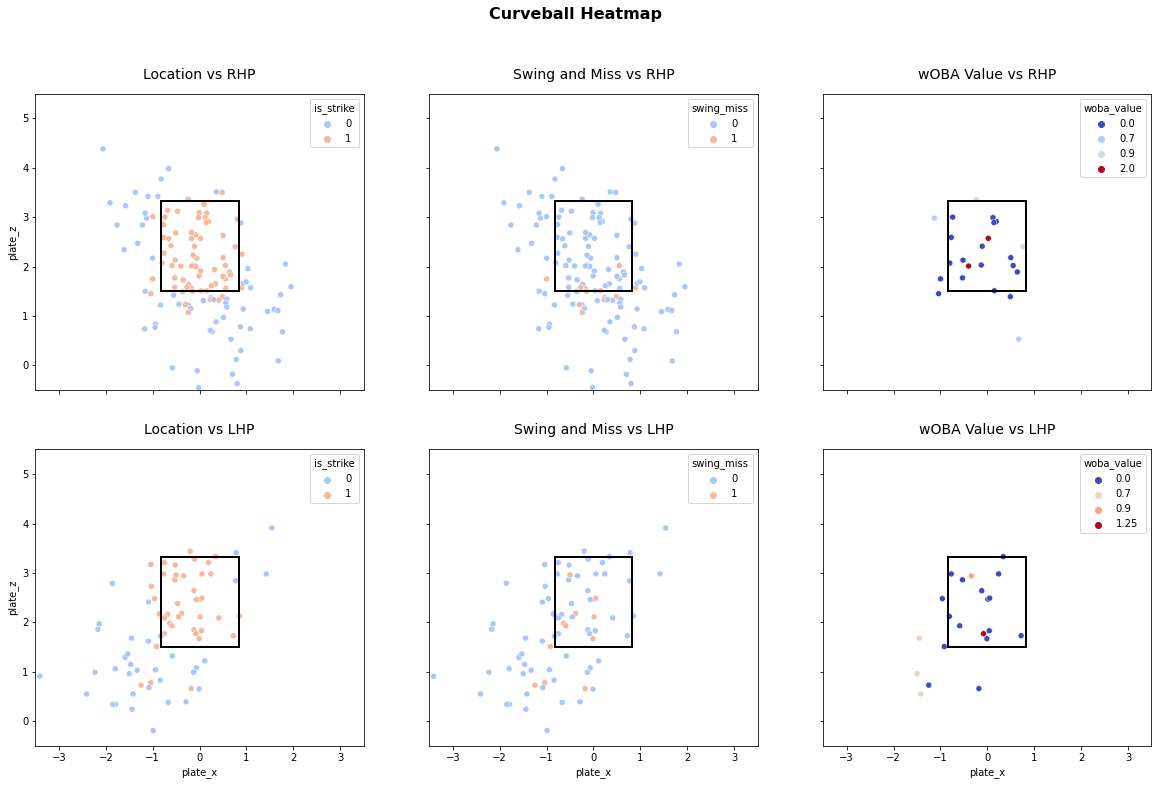

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

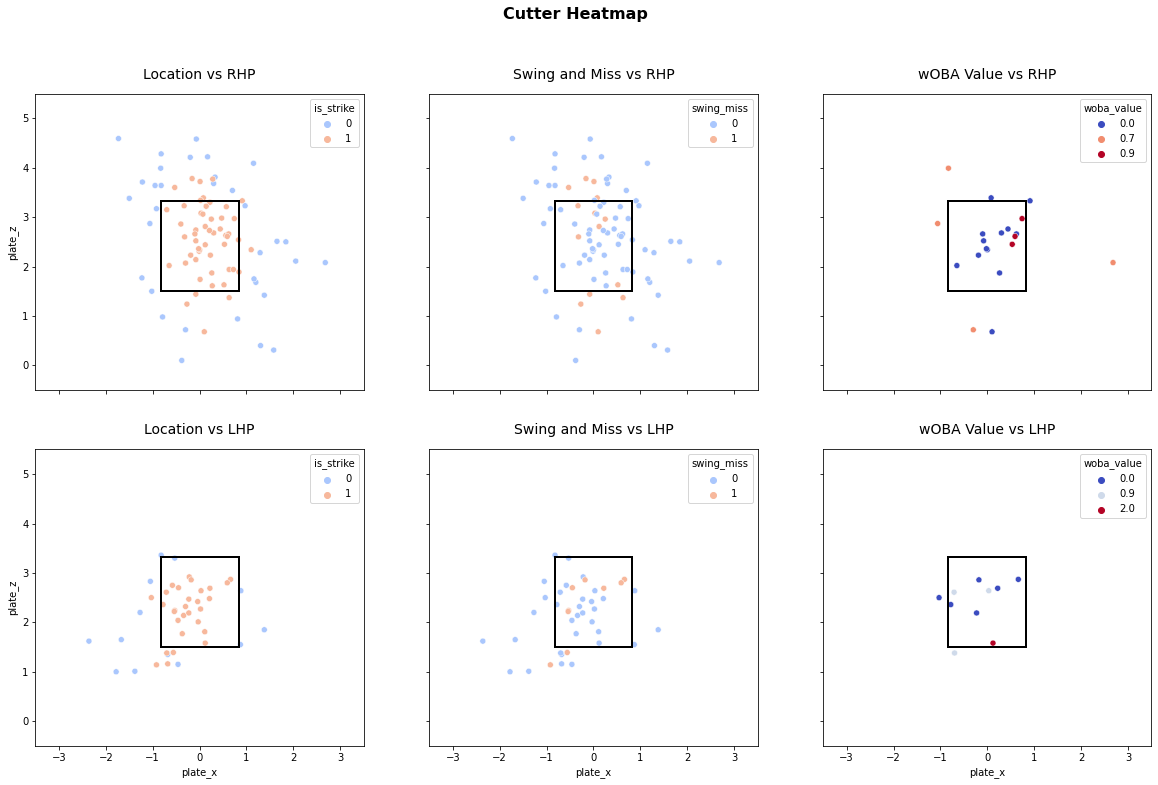

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

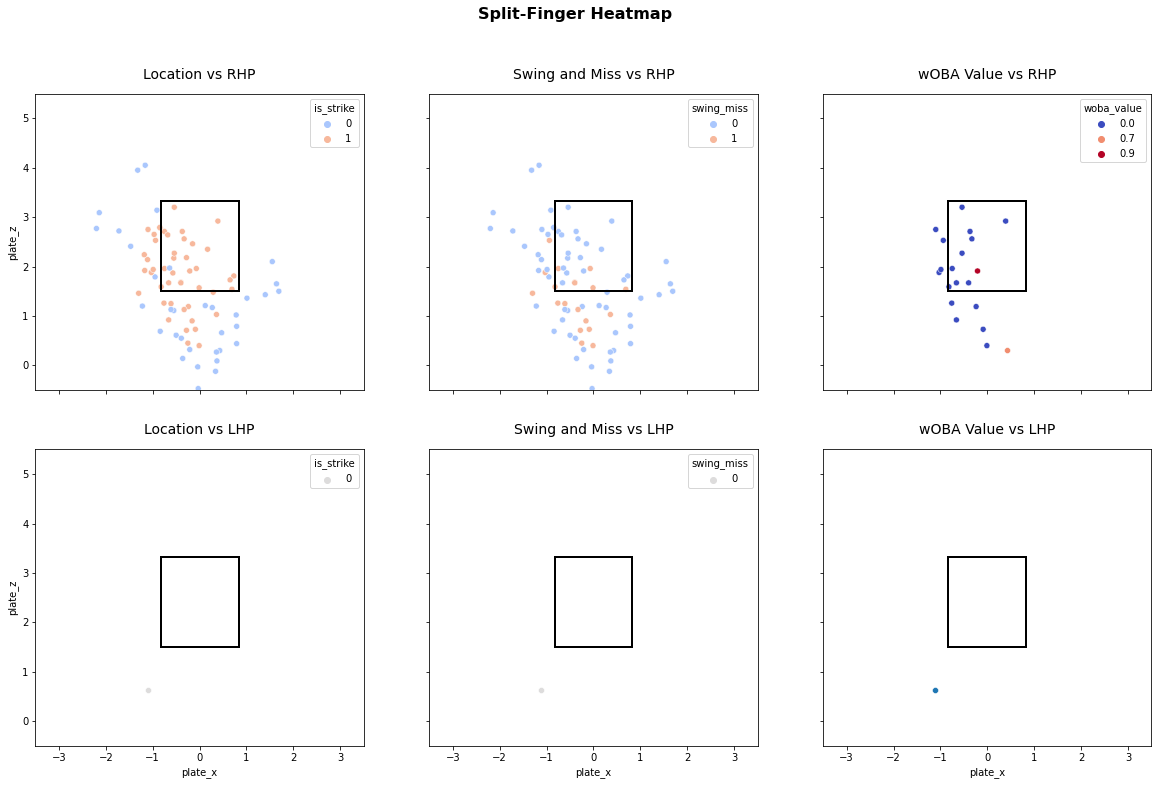

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

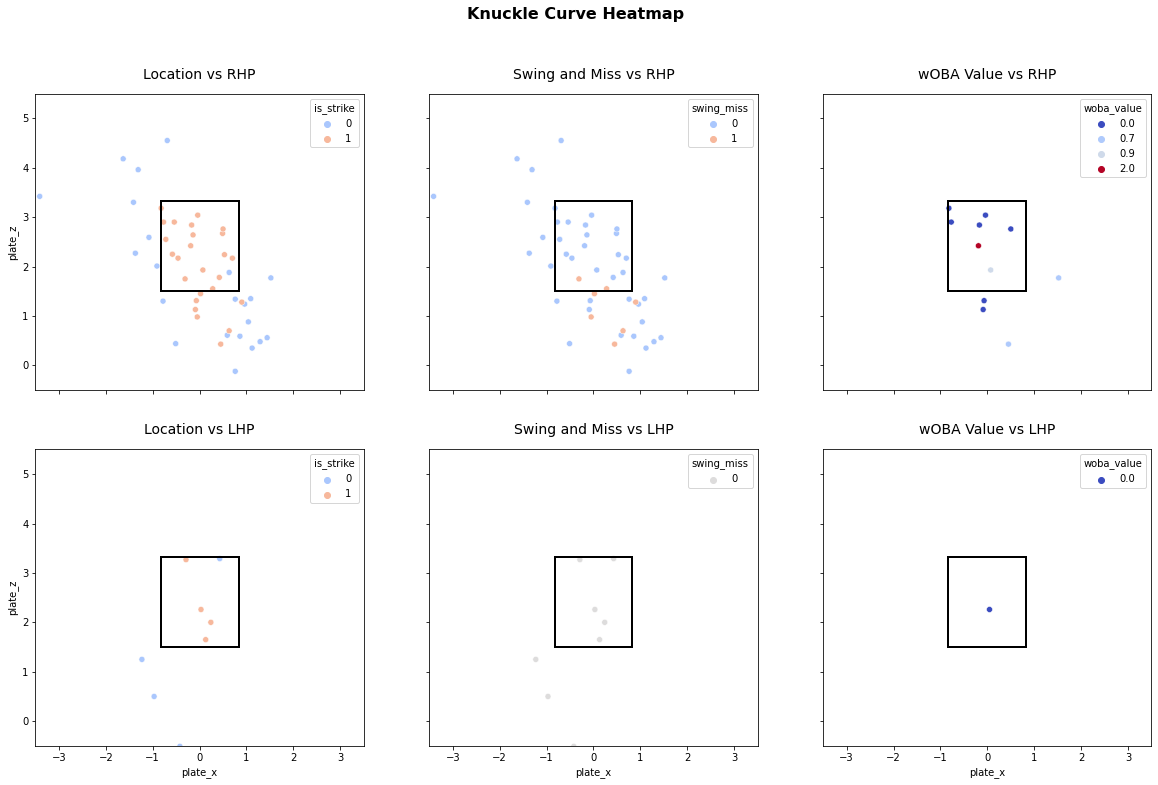

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

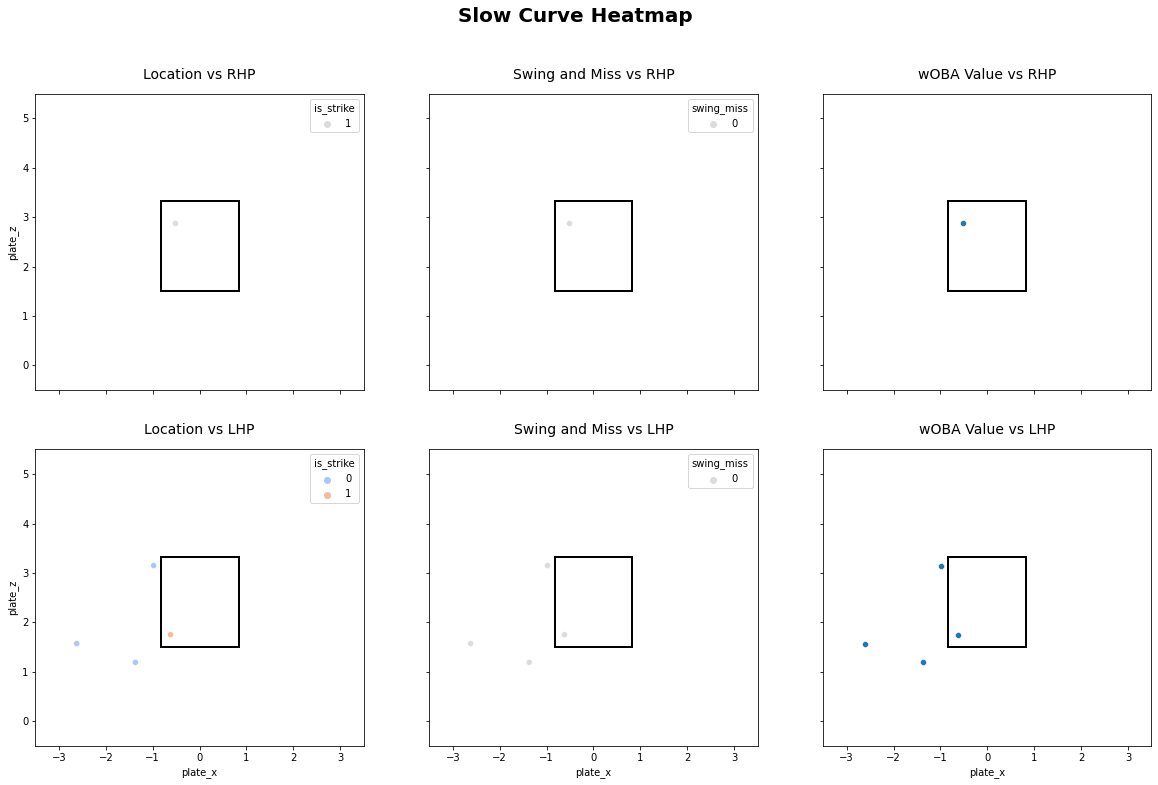

In [19]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 20, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5)
plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.5), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);